## Load Data:

In [ ]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# **Analyze Data**:

In [ ]:
import numpy as np
!pip install keras.utils 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=21d94e6cf4169b1e20549581baaa55d9e1eb93f7d47e9be76d86f8c31fef7de3
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
# Find the unique numbers from the train labels     10 categories:Trouser/pants,Pullover	shirt,Dress
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

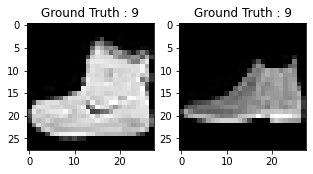

In [ ]:
#Also, take a look at what the images in our dataset

plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

plt.subplot(122) #"122" means "1x2 grid, 2th subplot".
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Data Preprocessing

In [ ]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
train_X = train_X.astype('float32')  #rescale the pixel values in range 0 - 1 inclusive, the standard is float32
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## One-hot Encoding

In [ ]:
# Change the labels from categorical to one-hot encoding( categorical data must be mapped to integers)
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


'Note that you can also print the train_Y_one_hot, \nwhich will display a matrix of size 60000 x 10 \nin which each row depicts one-hot encoding of an image >>> NOT RECOMMENDED'

# Partitioning the Data

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## Build CNN



In [ ]:
# Basically we will use three convolutional layers:
# The first layer will have 32-3 x 3 filters.
# The second layer will have 64-3 x 3 filters.
# The third layer will have 128-3 x 3 filters.
# In addition, there are three max-pooling layers each of size 2 x 2.

import tensorflow as tf
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size = 64 # the samples for one training 
epochs = 20
num_classes = 10
#NEURAL NETWORK ARCHITECTURE

#padding = 'same':the layer's outputs will have the same spatial dimensions as its inputs
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1))) #same: have an output with the same width and height as input
fashion_model.add(LeakyReLU(alpha=0.1)) #leakyReLU:the function will not be zero but will instead have a small negative slope.  -->update
fashion_model.add(MaxPooling2D((2, 2),padding='same')) 
fashion_model.add(Dropout(0.25)) #  0.25:the Fraction of the input units to drop

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same')) 
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25)) #0.25

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same')) 
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4)) #0.4

fashion_model.add(Flatten()) 
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.25)) #0.25
fashion_model.add(Dense(num_classes, activation='softmax'))
#Softmax converts a vector of values to a probability distribution.

fashion_model.summary()
#COMPLIE THE MODEL
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#crossentropy:  when there are two or more label classes,compute the crossentropy loss between the labels and predictions.
#Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#Adam is much faster than SGD, the default hyperparameters usually works fine, but it has its own pitfall too. Many accused Adam has convergence problems

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                        

## Train Model

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 111s 146ms/step - loss: 0.7625 - accuracy: 0.7121 - val_loss: 0.4516 - val_accuracy: 0.8336
Epoch 2/20
750/750 [==============================] - 101s 134ms/step - loss: 0.4902 - accuracy: 0.8182 - val_loss: 0.3882 - val_accuracy: 0.8583
Epoch 3/20
750/750 [==============================] - 99s 131ms/step - loss: 0.4308 - accuracy: 0.8407 - val_loss: 0.3360 - val_accuracy: 0.8713
Epoch 4/20
750/750 [==============================] - 98s 131ms/step - loss: 0.3982 - accuracy: 0.8538 - val_loss: 0.3246 - val_accuracy: 0.8788
Epoch 5/20
750/750 [==============================] - 101s 134ms/step - loss: 0.3773 - accuracy: 0.8598 - val_loss: 0.2982 - val_accuracy: 0.8911
Epoch 6/20
750/750 [==============================] - 100s 133ms/step - loss: 0.3634 - accuracy: 0.8653 - val_loss: 0.2991 - val_accuracy: 0.8891
Epoch 7/20
750/750 [==============================] - 99s 133ms/step - loss: 0.3505 - accuracy: 0.8710 - val_loss: 0.2718 - va

## Model Evaluation

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1) #changed to verbose=1 to show progress
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 [==============================] - 6s 20ms/step - loss: 0.2700 - accuracy: 0.9000
Test loss: 0.27004364132881165
Test accuracy: 0.8999999761581421


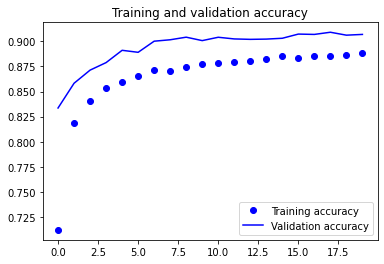

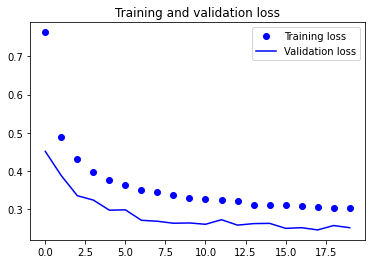

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
'''It can be seen above that the validation loss and validation accuracy both are in sync 
with the training loss and training accuracy. Even though the validation loss 
and accuracy line are not linear, but it shows that the model is not overfitting: 
the validation loss is decreasing and not increasing, and there is not much gap between 
training and validation accuracy.
Therefore, one can say that the model's generalization capability became much better 
since the loss on both test set and validation set was only slightly more compared to the training loss.'''
#Predicting Labels with the Trained Model (with dropout)
predicted_classes = fashion_model.predict(test_X)
'''Since the predictions you get are floating point values, it will not be feasible to compare 
the predicted labels with true test labels. So, the code will round off the output which will 
convert the float values into an integer. Further, you will use np.argmax() to select the index 
number which has a higher value in a row.
For example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for 
this should be a class label 1.'''
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

## Find Number of Correct Label Found in Test Set

Found 9156 correct labels


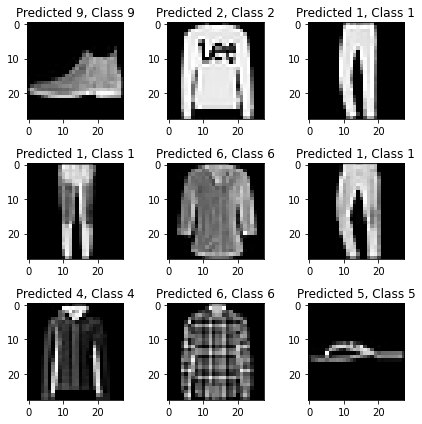

In [ ]:
correct = np.where(predicted_classes==test_Y)[0] # if predicted == label
print ("Found %d correct labels" % len(correct))
fig = plt.figure(figsize=(6,6))
for i, correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none') #shows correct images
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
  plt.tight_layout()

## Find Number of Incorrect Label Found in Test Set

Found 844 incorrect labels


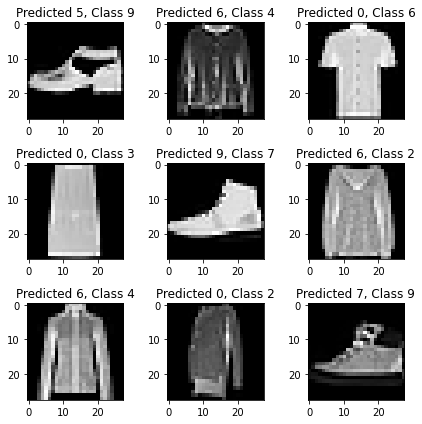

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0] # if predicted != label
print ("Found %d incorrect labels" % len(incorrect))
fig = plt.figure(figsize=(6,6))
for i, incorrect in enumerate(incorrect[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
  plt.tight_layout()

## Dropout introduction:
https://www.youtube.com/watch?v=ARq74QuavAo&t=309s

## Question1: Why we use dropout layers?
###What the dropout layers do: The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time

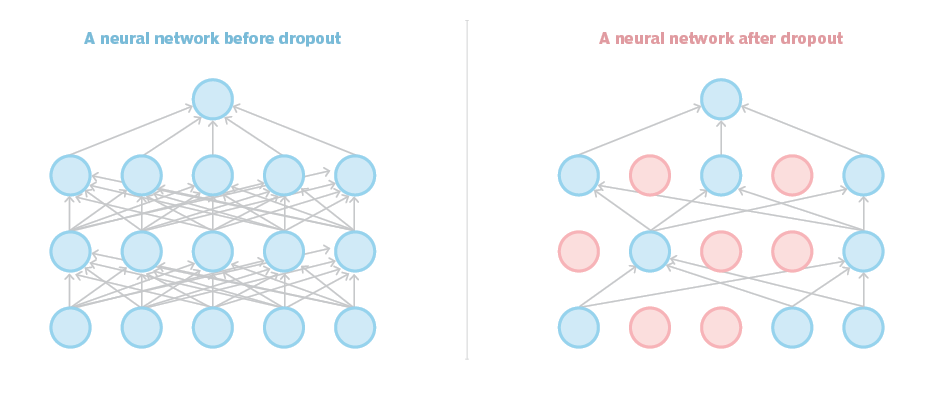

### What causes the overfitting? 
Dropout prevents overfitting due to a layer's "over-reliance" on a few of its inputs(have high weight). Because these inputs aren't always present during training (i.e. they are dropped at random), the layer learns to use all of its inputs, improving generalization.

### Btw, the situation that "overfitting due to too many iterations" can be countered through early stopping.(Vincent)

## Question2:
# Should the dropout layer being applied after maxpooling?


 Analysis of dropout（Mathematical）:
 https://pgaleone.eu/deep-learning/regularization/2017/01/10/anaysis-of-dropout/

Based on https://stats.stackexchange.com/questions/147850/are-pooling-layers-added-before-or-after-dropout-layers


## In a CNN, each neuron produces one feature map(the output of one filter applied to the previous layer). Since dropout works per-neuron, dropping a neuron means that the corresponding feature map is dropped So each feature map is either fully dropped or not dropped at all.

### Pooling usually operates separately on each feature map, so it should not make any difference if you apply dropout before or after pooling. 

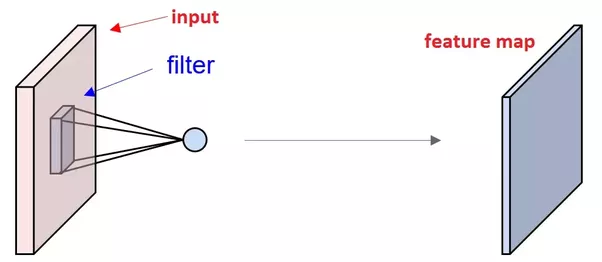

----I have to say I was wrong and actually it will be ***the same*** to put dropout layer before or after pooling.

## Question3:
###What will happen if we set the parameter to 0.0001 or 1?(0.2/0.5/0.8)

## Question4:
##So what will be the best dropout rate?

###Honestly I do not have an exact or accurate answer for this question. Normally people will pick something between 0.25 and 0.5 depending on how much we think our network will be likely to overfit. And I believe making it to 0.5 for the initial setting will be a 'not bad' choice, and we can see how we gonna change the dropout rate based on the plot with dropout rate = 0.5. 

## 24/02/2022 Updates

### For training data: deactivating and activating
### For test data: all neurons will be connected, w*p will be the new weight for every layer         
### p=1 - dropout rate


Suppose p = 50%, in which case during testing a neuron will be connected to twice as many input neurons as it was (on average) during training. To compensate for this fact, we need to multiply each neuron's input connection weights by 0.5 after training. if we don't, each neuron will get a total input signal roughly twice as large as what the network was trained on, and it unlikely to perform well.

https://datascience.stackexchange.com/questions/44293/how-does-dropout-work-during-testing-in-neural-network

https://www.youtube.com/watch?v=XmLYl17DbbA



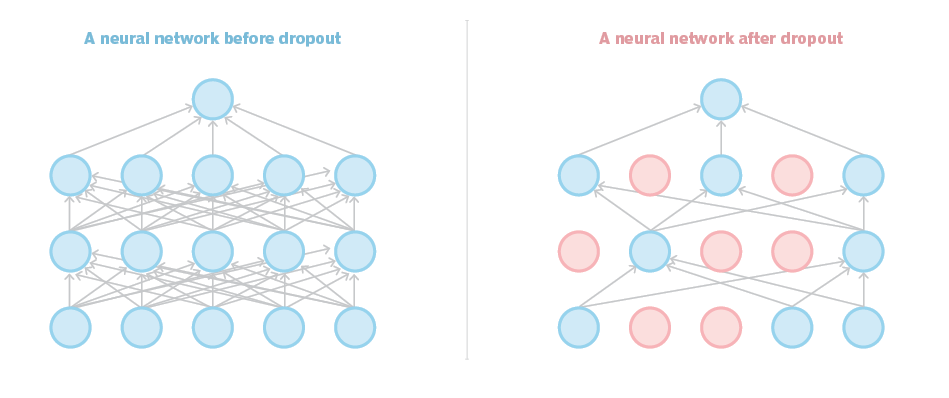

### --Why disable dropout during validation and testing?

https://stackoverflow.com/questions/44223585/why-disable-dropout-during-validation-and-testing

### -- Dropout layers for forward / backward pass

https://deepnotes.io/dropout

### -- How back propagation work
https://www.youtube.com/watch?v=6EXP2-d_xQA

### How the weights get updated:

https://hmkcode.com/ai/backpropagation-step-by-step/#:~:text=Backpropagation%2C%20short%20for%20%E2%80%9Cbackward%20propagation,proceeds%20backwards%20through%20the%20network.

hand-written digits play around:
https://www.cs.ryerson.ca/~aharley/vis/conv/